In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [30]:
df = pd.read_csv('sms-spam.csv',encoding="latin-1")

In [31]:
df.head()

,ï»¿v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [32]:
df.sample(5)

,ï»¿v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1528,ham,Hey what happen de. Are you alright.,NaN,NaN,NaN
3642,ham,"Sorry, left phone upstairs. OK, might be hecti...",NaN,NaN,NaN
2812,ham,Enjoy the showers of possessiveness poured on ...,NaN,NaN,NaN
3250,ham,"Iâ°ÃÃ·ll leave around four, ok?",NaN,NaN,NaN
380,ham,I guess that's why you re worried. You must kn...,NaN,NaN,NaN


In [34]:
df.columns

Index(['ï»¿v1', 'v2'], dtype='object')

In [33]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [35]:
df.head()

,ï»¿v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df.columns

Index(['ï»¿v1', 'v2'], dtype='object')

In [37]:
df.columns = ['result', 'input']

In [38]:
df.columns

Index(['result', 'input'], dtype='object')

In [39]:
df

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [40]:
df['result'].value_counts()

result
ham     4825
spam     747
Name: count, dtype: int64

In [41]:
df.isnull().sum()

result    0
input     0
dtype: int64

In [42]:
df.duplicated().sum()

np.int64(403)

In [43]:
df = df.drop_duplicates()

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [46]:
df.shape

(5169, 2)

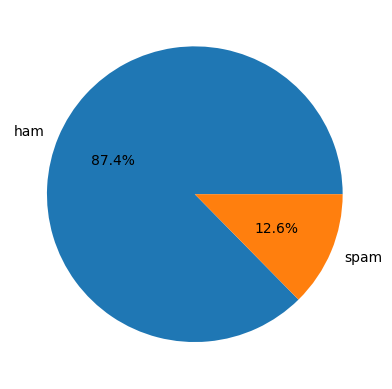

In [47]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [48]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[

True

In [49]:
df.replace({'result': {'ham': 0, 'spam': 1}}, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22232\1526164619.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'result': {'ham': 0, 'spam': 1}}, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22232\1526164619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'result': {'ham': 0, 'spam': 1}}, inplace=True)


In [50]:
df.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if not word in set(nltk.corpus.stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [63]:
print(transform_text('Hello, This is Arun Kumar . V!'))

hello arun kumar v


In [64]:
df['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [65]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
df['countCharacters'] = df['input'].apply(len)

df['countWords'] = df['input'].apply(lambda x: len(nltk.word_tokenize(x)))

df['countSentences'] = df['input'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22232\3958273774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countCharacters'] = df['input'].apply(len)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22232\3958273774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countWords'] = df['input'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22232\3958273774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [67]:
df

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,163,35,4
5568,0,Will Ã_ b going to esplanade fr home?,38,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [68]:
df[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,79.200426,18.456761,1.966531
std,58.387001,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [69]:
df[df['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.590788,17.123782,1.820195
std,56.405390,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [70]:
df[df['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,138.742726,27.675345,2.978560
std,30.419480,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

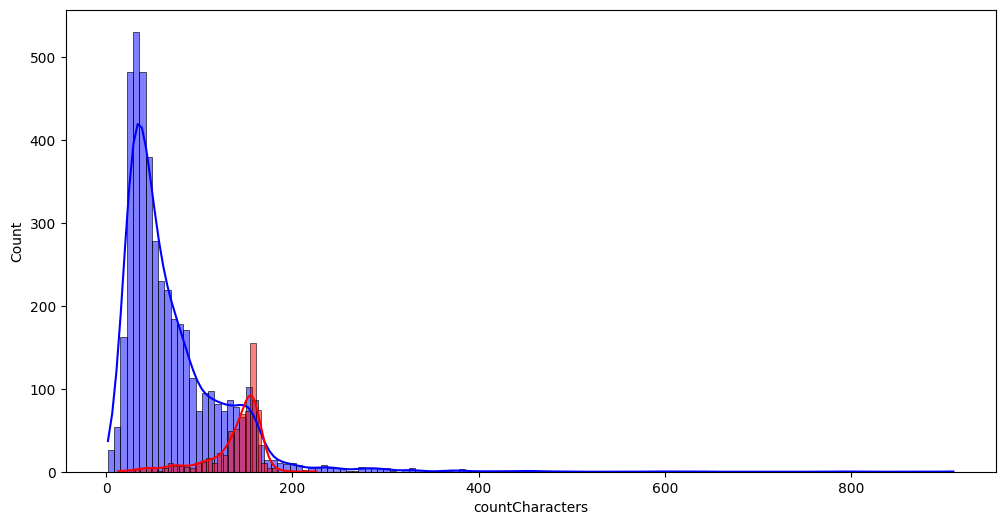

In [71]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['result'] == 0]['countCharacters'], color='blue', kde=True)
sns.histplot(df[df['result'] == 1]['countCharacters'], color='red', kde=True)

<Axes: xlabel='countWords', ylabel='Count'>

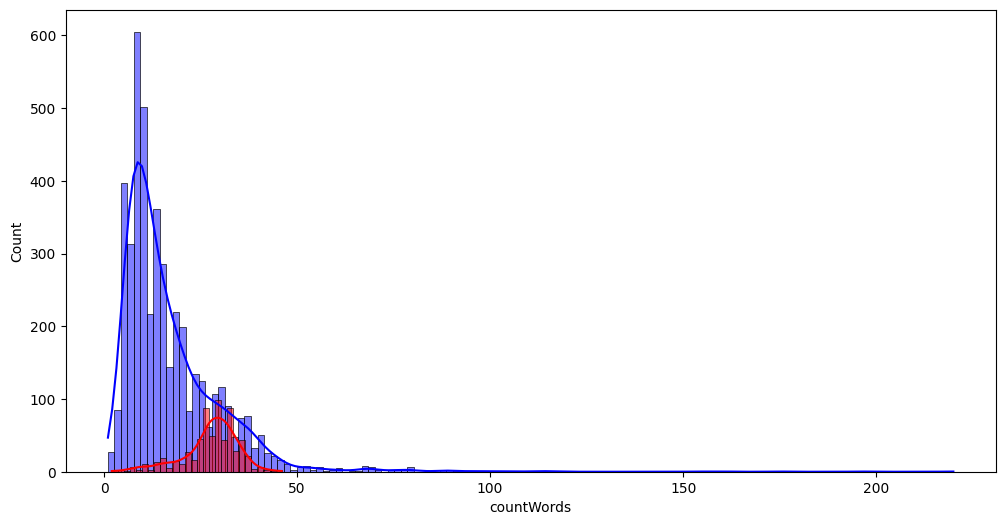

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['result'] == 0]['countWords'], color='blue', kde=True)
sns.histplot(df[df['result'] == 1]['countWords'], color='red', kde=True)

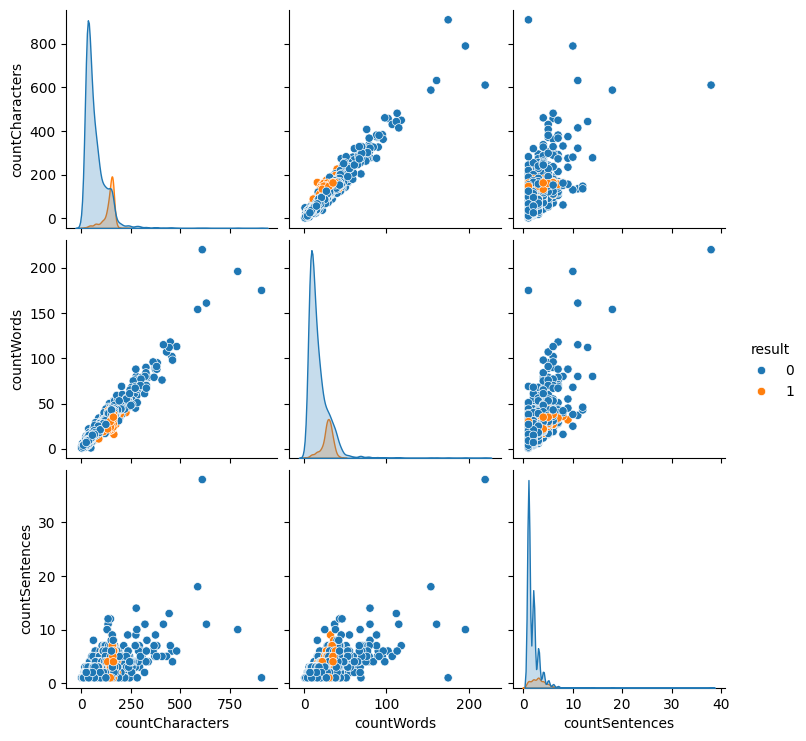

In [73]:
sns.pairplot(df, hue='result')

In [74]:
df['processed'] = df['input'].apply(transform_text)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22232\2364510467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['input'].apply(transform_text)


In [75]:
df.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [76]:
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df[df['result'] == 0]['processed']))

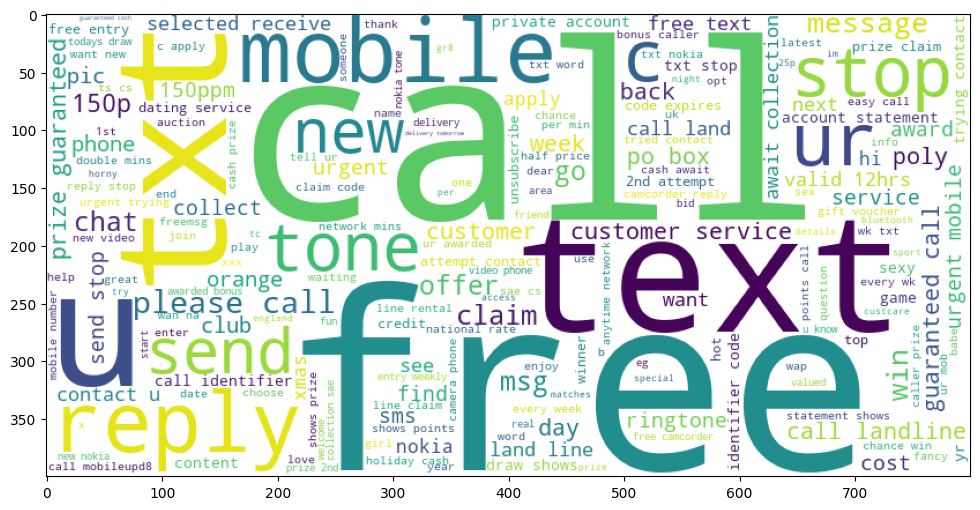

In [77]:
spamWC = wc.generate(df[df['result'] == 1]['processed'].str.cat(sep=' '))
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

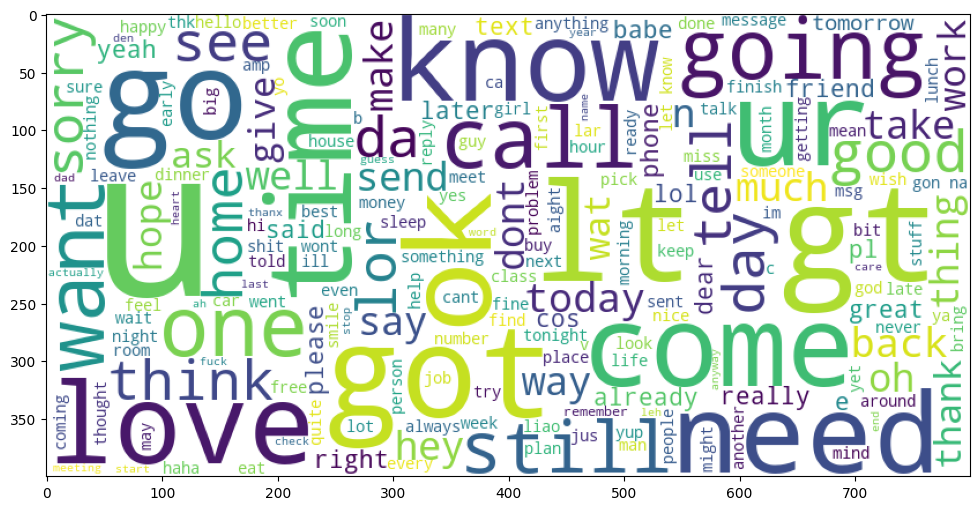

In [78]:
notSpamWC = wc.generate(df[df['result'] == 0]['processed'].str.cat(sep=' '))
plt.figure(figsize=(12, 6))
plt.imshow(notSpamWC)

In [79]:
spamWords = list()

for msg in df[df['result'] == 1]['processed'].tolist():
    for word in msg.split():
        spamWords.append(word)

spamWords

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hours',
 'mobile',
 '11',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chances',
 'win',
 'cash',
 '100',
 'pounds',
 'txt',
 'csh11',
 'send',
 'cost',
 '6days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lc

In [80]:
spamWordsDictioanry = Counter(spamWords)

spamWordsDictioanry.most_common(40)

[('call', 302),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('u', 119),
 ('ur', 119),
 ('mobile', 105),
 ('text', 104),
 ('stop', 104),
 ('4', 97),
 ('claim', 96),
 ('reply', 96),
 ('prize', 81),
 ('get', 70),
 ('new', 64),
 ('send', 58),
 ('urgent', 57),
 ('nokia', 54),
 ('cash', 51),
 ('contact', 51),
 ('please', 49),
 ('service', 48),
 ('win', 47),
 ('c', 45),
 ('phone', 43),
 ('guaranteed', 42),
 ('per', 41),
 ('week', 40),
 ('customer', 40),
 ('tone', 38),
 ('chat', 36),
 ('cs', 35),
 ('draw', 34),
 ('mins', 32),
 ('awarded', 31),
 ('line', 31),
 ('latest', 29),
 ('message', 29),
 ('shows', 29),
 ('150ppm', 29)]

In [81]:
mostCommonSpamWords = pd.DataFrame(spamWordsDictioanry.most_common(40))

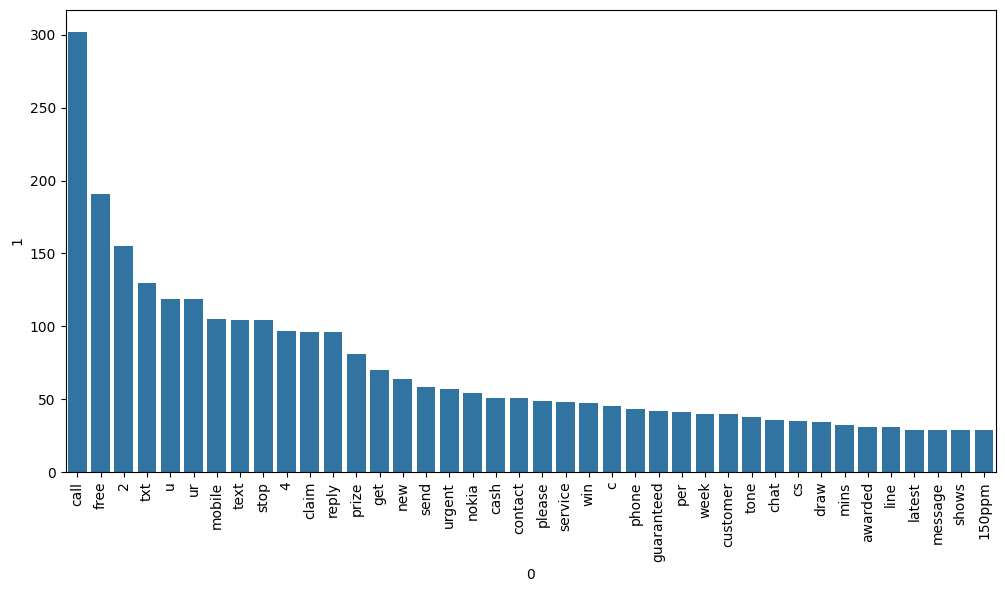

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSpamWords, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [83]:
cv = CountVectorizer()

In [84]:
X = cv.fit_transform(df['processed']).toarray()
X.shape

(5169, 7968)

In [85]:
y = df['result'].values
y.shape

(5169,)

In [86]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 7968))

In [87]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [90]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print('Gaussian Naive Bayes Accuracy:', accuracy_score(y_test, y_pred1))
print('Gaussian Naive Bayes Precision:', precision_score(y_test, y_pred1))
print('Gaussian Naive Bayes Classification Report:', classification_report(y_test, y_pred1))
print('Gaussian Naive Bayes Confusion Matrix:', confusion_matrix(y_test, y_pred1))

Gaussian Naive Bayes Accuracy: 0.8849129593810445
Gaussian Naive Bayes Precision: 0.5570175438596491
Gaussian Naive Bayes Classification Report:               precision    recall  f1-score   support

           0       0.98      0.89      0.93       889
           1       0.56      0.88      0.68       145

    accuracy                           0.88      1034
   macro avg       0.77      0.88      0.81      1034
weighted avg       0.92      0.88      0.89      1034

Gaussian Naive Bayes Confusion Matrix: [[788 101]
 [ 18 127]]


In [91]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print('Multinomial Naive Bayes Accuracy:', accuracy_score(y_test, y_pred2))
print('Multinomial Naive Bayes Precision:', precision_score(y_test, y_pred2))
print('Multinomial Naive Bayes Classification Report:', classification_report(y_test, y_pred2))
print('Multinomial Naive Bayes Confusion Matrix:', confusion_matrix(y_test, y_pred2))


Multinomial Naive Bayes Accuracy: 0.9729206963249516
Multinomial Naive Bayes Precision: 0.8874172185430463
Multinomial Naive Bayes Classification Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.92      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Multinomial Naive Bayes Confusion Matrix: [[872  17]
 [ 11 134]]


In [92]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print('Bernoulli Naive Bayes Accuracy:', accuracy_score(y_test, y_pred3))
print('Bernoulli Naive Bayes Precision:', precision_score(y_test, y_pred3))
print('Bernoulli Naive Bayes Classification Report:', classification_report(y_test, y_pred3))
print('Bernoulli Naive Bayes Confusion Matrix:', confusion_matrix(y_test, y_pred3))

Bernoulli Naive Bayes Accuracy: 0.965183752417795
Bernoulli Naive Bayes Precision: 0.9739130434782609
Bernoulli Naive Bayes Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.77      0.86       145

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034

Bernoulli Naive Bayes Confusion Matrix: [[886   3]
 [ 33 112]]


In [94]:
import pickle
pickle.dump(cv, open('sms_vector.pkl', 'wb'))
pickle.dump(mnb, open('sms_model.pkl', 'wb'))